In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import numpy as np
import copy

In [2]:
def initialize_graph(n, mu, sigma):
    G = nx.Graph()
    # init graph
    loads = np.random.normal(mu, sigma, n)
    for i in range(n):
        G.add_node(i, load=loads[i], type="worker")
    set_node_role(G)

    # connect workers and intermediaries
    workers = [n for n, attr in G.nodes(data=True) if attr["type"] == "worker"]
    intermediaries = [
        n for n, attr in G.nodes(data=True) if attr["type"] == "intermediary"
    ]
    for worker in workers:
        G.add_edge(worker, random.choice(intermediaries))

    return G


def set_node_role(G):
    for _, attr in G.nodes(data=True):
        attr["type"] = "worker"
    low_load_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["load"])[
        : int(0.2 * len(G.nodes()))
    ]
    for node, data in low_load_nodes:
        data["type"] = "intermediary"


def work_and_adjust(G):
    new_edges = []
    for n, attr in G.nodes(data=True):
        if attr["type"] == "worker":
            # worker flow
            load_reduction = random.uniform(0, attr["load"] * 0.1)
            attr["load"] -= load_reduction
            neighbors = list(G.neighbors(n))
            if neighbors:
                load_share = load_reduction / len(neighbors)
                for neighbor in neighbors:
                    G.nodes[neighbor]["load"] += load_share
        else:
            # intermediary flow
            neighbors = [
                nei for nei in G.neighbors(n) if G.nodes[nei]["type"] == "worker"
            ]
            for nei in neighbors:
                other_workers = [
                    w
                    for w in G.nodes()
                    if w != nei
                    and G.nodes[w]["type"] == "worker"
                    and not G.has_edge(w, nei)
                ]
                if other_workers:
                    new_worker = min(
                        other_workers, key=lambda x: (G.nodes[x]["load"], G.degree(x))
                    )
                    new_edges.append((nei, new_worker))
                    if G.degree(nei) > 3:
                        G.remove_edge(nei, max(
                            G.neighbors(nei), key=lambda x: G.nodes[x]["load"]
                        ))

    for edge in new_edges:
        G.add_edge(*edge)

    return new_edges


def update_and_visualize(G, pos, interval, iterations):
    for _ in range(iterations):
        clear_output(wait=True)
        print(f"Updating and visualizing graphs... Iteration {_+1}/{iterations}")
        new_edges = work_and_adjust(G)
        set_node_role(G)
        nx.draw(
            G,
            pos,
            node_color=[
                "lightgrey" if attr["type"] != "intermediary" else "lightblue"
                for _, attr in G.nodes(data=True)
            ],
            node_size=[attr["load"] * 50 for _, attr in G.nodes(data=True)],
            edge_color="gray",
        )
        for n, attr in G.nodes(data=True):
            plt.text(
                pos[n][0],
                pos[n][1],
                f"{attr['load']:.2f}",
                fontsize=8,
                verticalalignment="bottom",
                horizontalalignment="center",
            )

        if new_edges:
            nx.draw_networkx_edges(
                G, pos, edgelist=new_edges, edge_color="green", style="dashed"
            )
        plt.show()
        plt.pause(interval)
        plt.clf()


Updating and visualizing graphs... Iteration 10/10


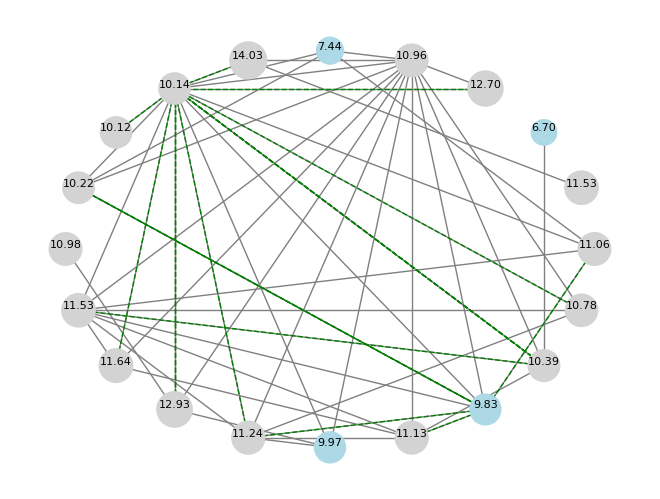

(10.76586414360828, 1.611451730214097)

<Figure size 640x480 with 0 Axes>

In [3]:
n = 20
mu = 10
sigma = 5

G = initialize_graph(n, mu, sigma)
pos = nx.circular_layout(G)
update_and_visualize(G, pos, interval=2, iterations=10)

loads = [attr["load"] for _, attr in G.nodes(data=True)]

mean_load = np.mean(loads)
std_dev_load = np.std(loads)

mean_load, std_dev_load

Updating and visualizing graphs... Iteration 1/10


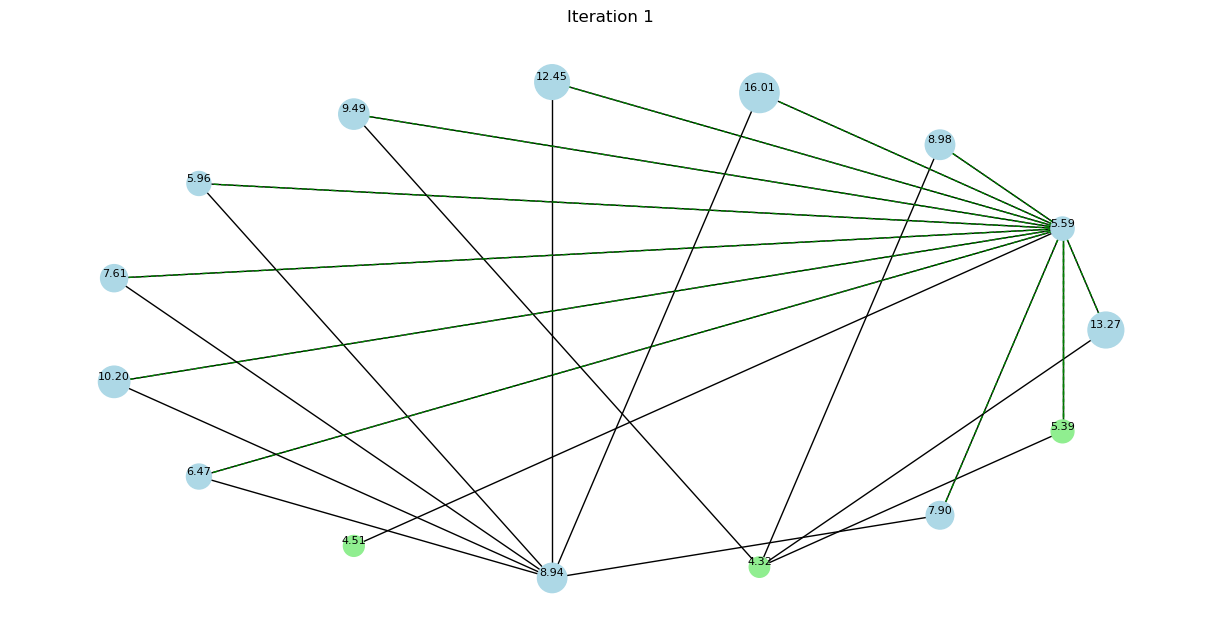

Updating and visualizing graphs... Iteration 2/10


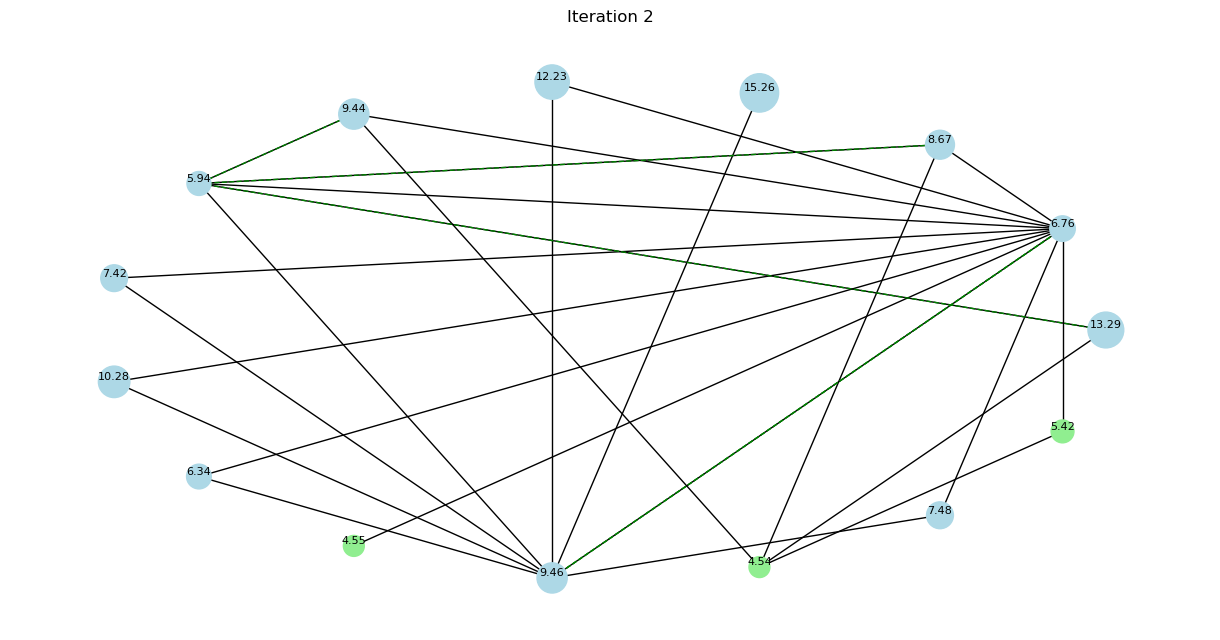

Updating and visualizing graphs... Iteration 3/10


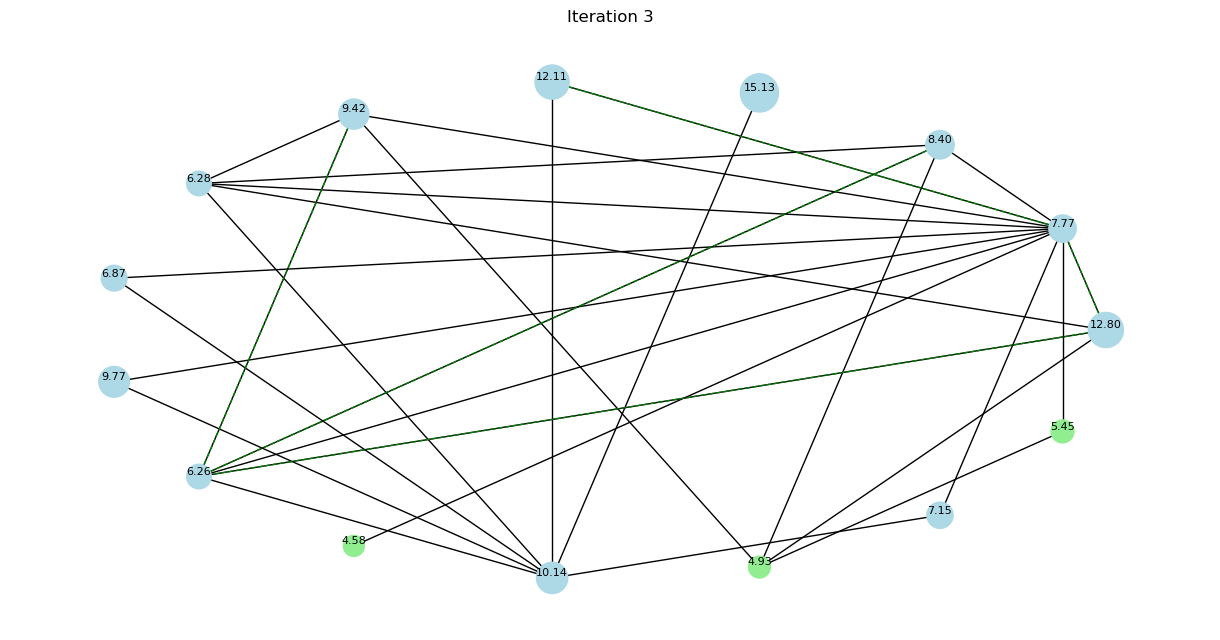

Updating and visualizing graphs... Iteration 4/10


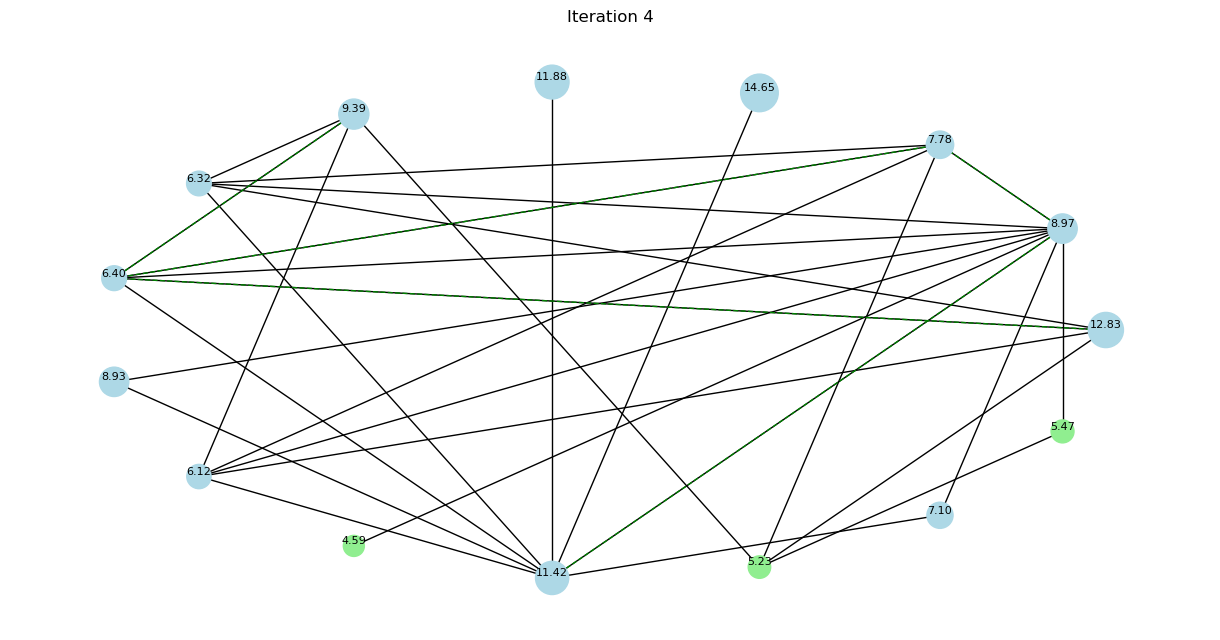

Updating and visualizing graphs... Iteration 5/10


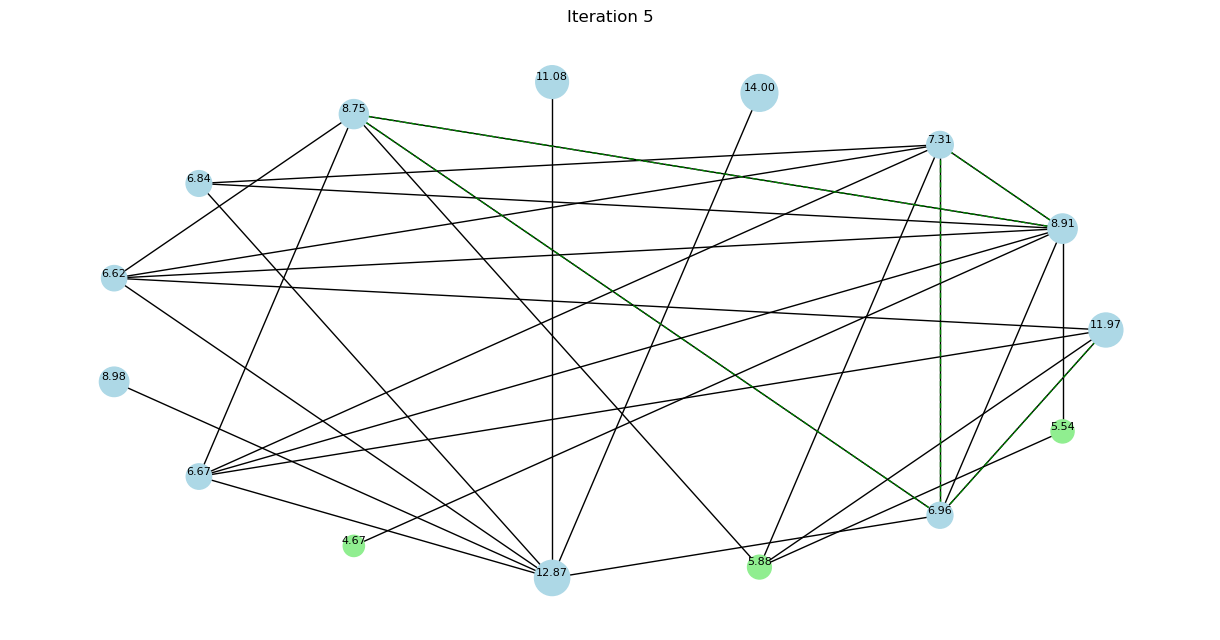

Updating and visualizing graphs... Iteration 6/10


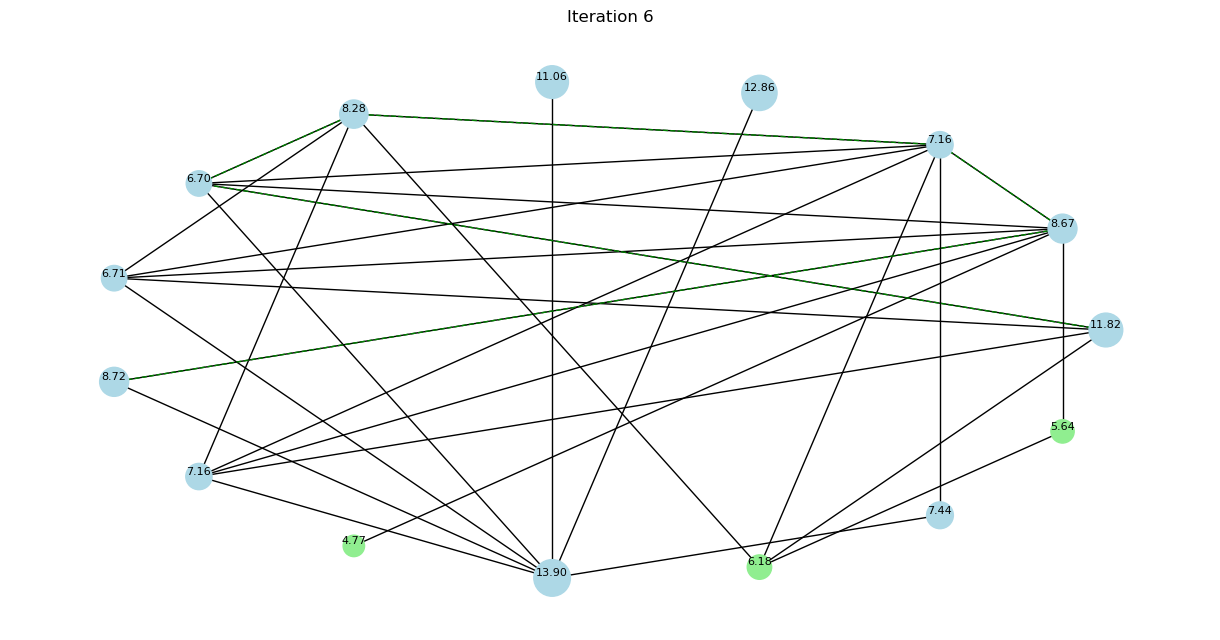

Updating and visualizing graphs... Iteration 7/10


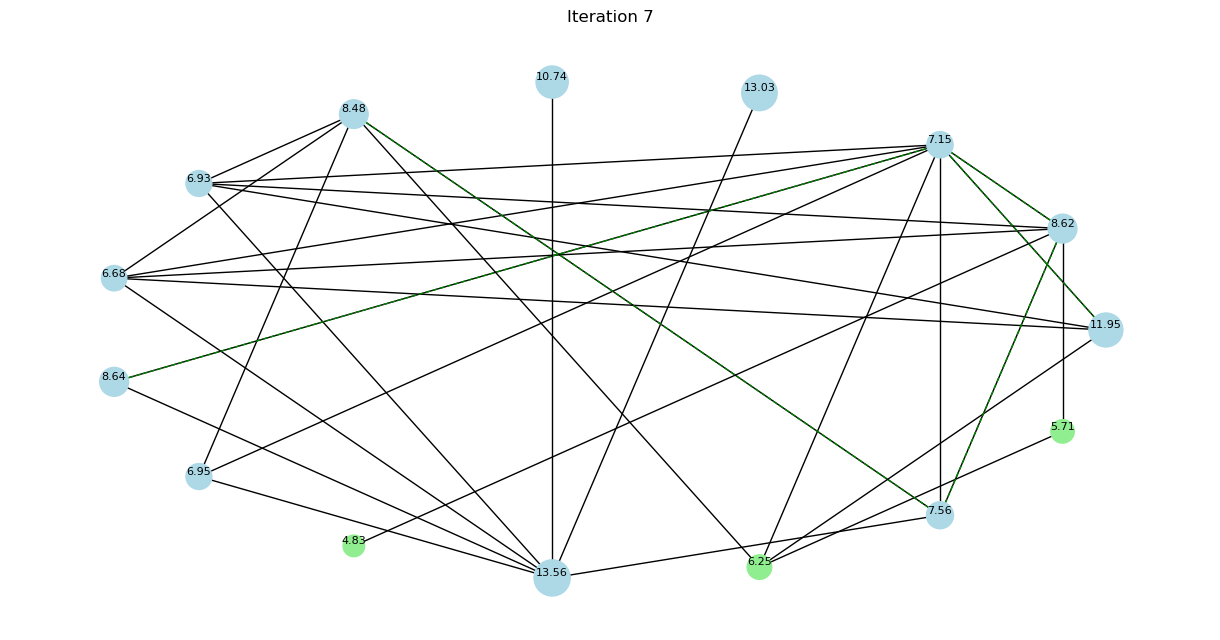

Updating and visualizing graphs... Iteration 8/10


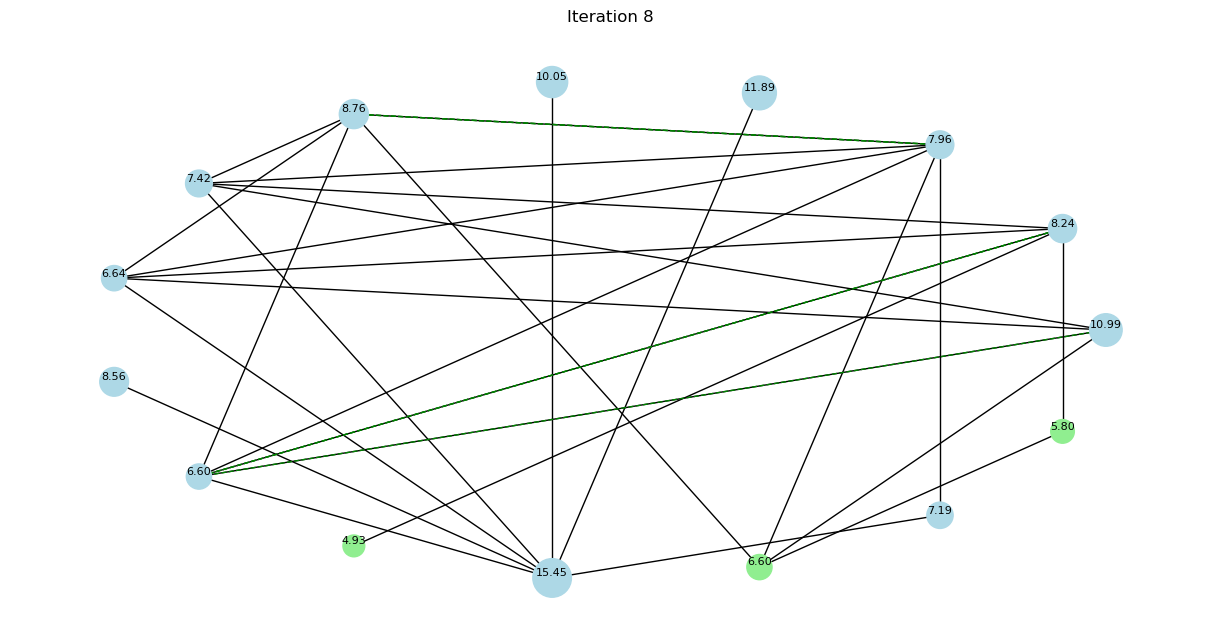

Updating and visualizing graphs... Iteration 9/10


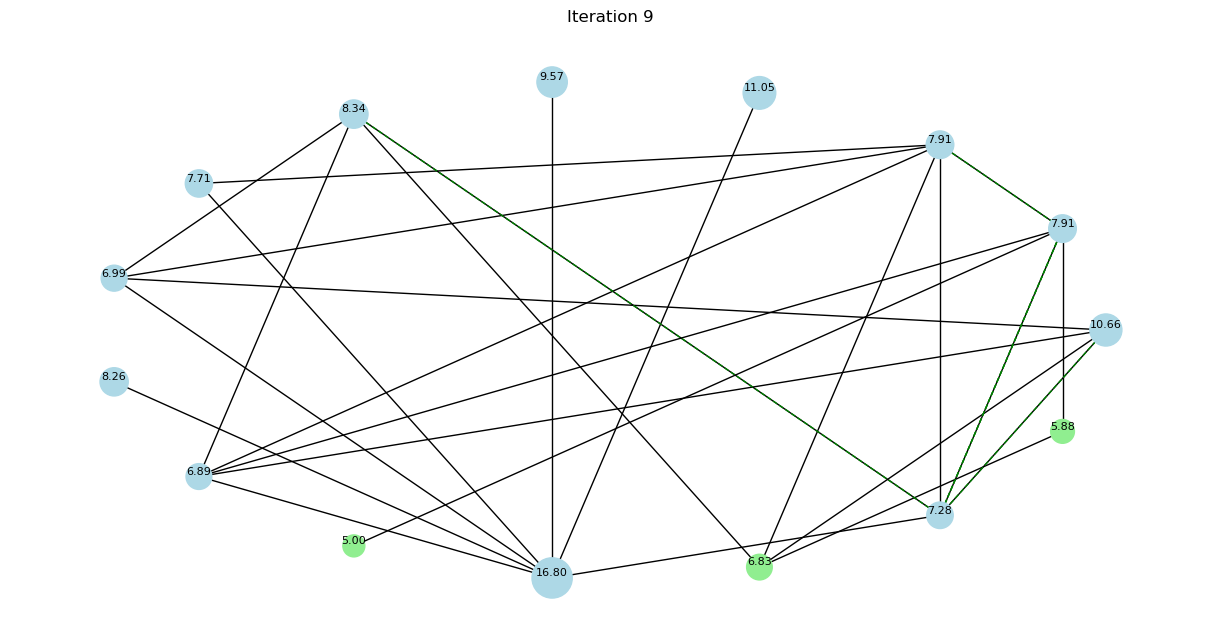

Updating and visualizing graphs... Iteration 10/10


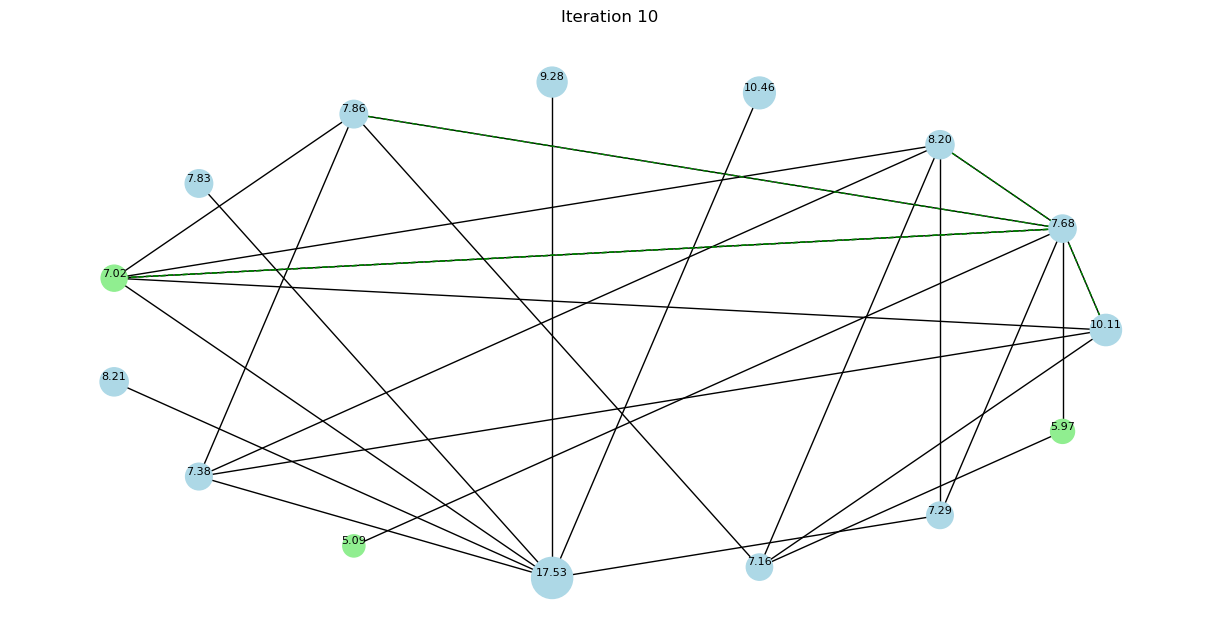

(8.47175403447858, 2.769141012414273)

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random
import numpy as np

def initialize_graph(n, mu, sigma):
    G = nx.Graph()
    # 初始化图
    loads = np.random.normal(mu, sigma, n)
    for i in range(n):
        G.add_node(i, load=loads[i], type="worker")
    set_node_role(G)

    # 连接工人和中介
    workers = [n for n, attr in G.nodes(data=True) if attr["type"] == "worker"]
    intermediaries = [
        n for n, attr in G.nodes(data=True) if attr["type"] == "intermediary"
    ]
    for worker in workers:
        G.add_edge(worker, random.choice(intermediaries))

    return G

def set_node_role(G):
    for _, attr in G.nodes(data=True):
        attr["type"] = "worker"
    low_load_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["load"])[:int(0.2 * len(G.nodes()))]
    for node, data in low_load_nodes:
        data["type"] = "intermediary"

def work_and_adjust(G):
    new_edges = []
    for n, attr in G.nodes(data=True):
        if attr["type"] == "worker":
            # 工人流动
            load_reduction = random.uniform(0, attr["load"] * 0.1)
            attr["load"] -= load_reduction
            neighbors = list(G.neighbors(n))
            if neighbors:
                load_share = load_reduction / len(neighbors)
                for neighbor in neighbors:
                    G.nodes[neighbor]["load"] += load_share
        else:
            # 中介流动
            neighbors = [nei for nei in G.neighbors(n) if G.nodes[nei]["type"] == "worker"]
            for nei in neighbors:
                other_workers = [
                    w for w in G.nodes()
                    if w != nei
                    and G.nodes[w]["type"] == "worker"
                    and not G.has_edge(w, nei)
                ]
                if other_workers:
                    new_worker = min(other_workers, key=lambda x: (G.nodes[x]["load"], G.degree(x)))
                    new_edges.append((nei, new_worker))
                    if G.degree(nei) > 3:
                        G.remove_edge(nei, max(G.neighbors(nei), key=lambda x: G.nodes[x]["load"]))
    for edge in new_edges:
        G.add_edge(*edge)
    return new_edges

def update_and_visualize(G, pos, iterations):
    for i in range(iterations):
        print(f"Updating and visualizing graphs... Iteration {i+1}/{iterations}")
        new_edges = work_and_adjust(G)
        set_node_role(G)
        plt.figure(figsize=(12, 6))
        nx.draw(
            G,
            pos,
            node_color=[
                "lightblue" if attr["type"] != "intermediary" else "lightgreen"
                for _, attr in G.nodes(data=True)
            ],
            node_size=[attr["load"] * 50 for _, attr in G.nodes(data=True)],
            edge_color="black",
        )
        for n, attr in G.nodes(data=True):
            plt.text(
                pos[n][0],
                pos[n][1],
                f"{attr['load']:.2f}",
                fontsize=8,
                verticalalignment="bottom",
                horizontalalignment="center",
            )
        if new_edges:
            nx.draw_networkx_edges(
                G, pos, edgelist=new_edges, edge_color="green", style="dashed"
            )
        plt.title(f"Iteration {i+1}")
        plt.show()

n = 15
mu = 10
sigma = 5

G = initialize_graph(n, mu, sigma)
pos = nx.circular_layout(G)
update_and_visualize(G, pos, iterations=10)

loads = [attr["load"] for _, attr in G.nodes(data=True)]

mean_load = np.mean(loads)
std_dev_load = np.std(loads)

mean_load, std_dev_load
